# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
from citipy import citipy
#from config import openweatherkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key
#api_key = "02485a48a01e1133ea9b6e3d2adc8bbd"
api_key="c400bb631a29a3b65bf60a13b9f3d64c"

# Starting URL for Weather Map API Call

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=&APPID=" + api_key
url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="


In [4]:
# Create empty lists to append the API data into the lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []



# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    #urlCity=url+ "&q ="+ city
    urlCity=url + city
    
    try: 
        response = requests.get(urlCity).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop for not over exceed rate limitation of API
        time.sleep(1.03)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Nanortalik
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=nanortalik
Processing Record 2 | Padang
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=padang
City not found. Skipping...
Processing Record 3 | Tessalit
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tessalit
Processing Record 4 | Kununurra
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kununurra
Processing Record 5 | Tiksi
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tiksi
Processing Record 6 | Rikitea
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=rikitea
Processing 

Processing Record 55 | Kaili
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kaili
Processing Record 56 | Port-Cartier
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=port-cartier
Processing Record 57 | Cockburn Town
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=cockburn town
Processing Record 58 | Mirabad
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=mirabad
Processing Record 59 | Tubigon
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tubigon
City not found. Skipping...
Processing Record 60 | Chepareria
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=chepareria
Processing Record 61 | Chapais
https://api.openweathermap.org/data/2.5/w

City not found. Skipping...
Processing Record 110 | Birao
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=birao
Processing Record 111 | Magistralnyy
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=magistralnyy
Processing Record 112 | Faya
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=faya
Processing Record 113 | Oisterwijk
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=oisterwijk
City not found. Skipping...
Processing Record 114 | Saint George
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=saint george
Processing Record 115 | Kavaratti
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kavaratti
Processing Record 116 | Clyde River
https:

Processing Record 164 | Salinopolis
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=salinopolis
Processing Record 165 | Luderitz
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=luderitz
Processing Record 166 | Kahului
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kahului
Processing Record 167 | Eureka
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=eureka
Processing Record 168 | Tigil
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tigil
Processing Record 169 | Tarko-Sale
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tarko-sale
Processing Record 170 | Ust-Kuyga
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf6

Processing Record 218 | Warwick
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=warwick
Processing Record 219 | Naze
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=naze
City not found. Skipping...
Processing Record 220 | Rocky Mountain House
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=rocky mountain house
Processing Record 221 | Adrar
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=adrar
Processing Record 222 | Alice Springs
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=alice springs
Processing Record 223 | Liwale
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=liwale
Processing Record 224 | Tremedal
https://api.openweathermap.org/

Processing Record 272 | Dolinsk
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=dolinsk
Processing Record 273 | Avera
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=avera
Processing Record 274 | Port Hedland
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=port hedland
Processing Record 275 | Te Anau
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=te anau
Processing Record 276 | Batagay-Alyta
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=batagay-alyta
Processing Record 277 | Labuhan
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=labuhan
Processing Record 278 | Bulgan
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b

Processing Record 327 | Saint-Augustin
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=saint-augustin
Processing Record 328 | Xinzhi
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=xinzhi
Processing Record 329 | Athabasca
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=athabasca
Processing Record 330 | Peniche
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=peniche
Processing Record 331 | Beaufort
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=beaufort
Processing Record 332 | Monrovia
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=monrovia
Processing Record 333 | Moussoro
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a2

Processing Record 381 | Kathu
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kathu
Processing Record 382 | Duverge
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=duverge
City not found. Skipping...
Processing Record 383 | Pangobilian
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=pangobilian
Processing Record 384 | Narsaq
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=narsaq
Processing Record 385 | Itarema
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=itarema
Processing Record 386 | Baiyin
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=baiyin
Processing Record 387 | Luanda
https://api.openweathermap.org/data/2.5/weather?appid=c400b

Processing Record 435 | Mandalgovi
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=mandalgovi
Processing Record 436 | Manokwari
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=manokwari
Processing Record 437 | Anzio
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=anzio
Processing Record 438 | Poronaysk
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=poronaysk
City not found. Skipping...
Processing Record 439 | Roald
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=roald
Processing Record 440 | Nosy Varika
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=nosy varika
Processing Record 441 | Balagansk
https://api.openweathermap.org/data/2.5/we

Processing Record 490 | Mabaruma
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=mabaruma
Processing Record 491 | Fairbanks
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=fairbanks
Processing Record 492 | Auki
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=auki
Processing Record 493 | Zverinogolovskoye
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=zverinogolovskoye
Processing Record 494 | Kokopo
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kokopo
Processing Record 495 | Marienburg
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=marienburg
Processing Record 496 | Istok
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a

Processing Record 545 | Kieta
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kieta
Processing Record 546 | Port Hardy
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=port hardy
Processing Record 547 | Bissau
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=bissau
City not found. Skipping...
Processing Record 548 | Bonavista
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=bonavista
Processing Record 549 | Evensk
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=evensk
Processing Record 550 | Orsk
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=orsk
Processing Record 551 | Cabo Rojo
https://api.openweathermap.org/data/2.5/weather?appid=c400bb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count

weather_data.head()

# Save data frame to CSV
weather_data.to_csv('output_data/weather_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/weather_data.csv'

In [6]:
# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nanortalik,88,GL,1553476127,94,60.14,-45.24,31.26,39.73
1,Padang,20,ID,1553472000,88,-0.92,100.36,77.00,1.12
2,Tessalit,88,ML,1553476130,20,20.20,1.01,72.30,4.61
3,Kununurra,0,AU,1553473800,52,-15.77,128.74,91.40,10.29
4,Tiksi,44,RU,1553476119,61,71.64,128.87,-7.72,3.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Max_Temp_vs_Latitude.png'

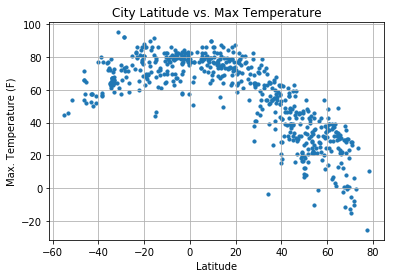

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()
png




#### Latitude vs. Humidity Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

#### Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Wind Speed_vs_Latitude.png")